# Vježba 02: Primjena CRISP-DM metodologije u Pythonu
# Faze: Business Understanding, Data Understanding, Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# FAZA 1: BUSINESS UNDERSTANDING (Razumijevanje Poslovanja)
# CILJ: Razumjeti osnovne karakteristike prodaje u online trgovini.
# POSLOVNA PITANJA:
# 1. Koji proizvodi donose najviše prihoda?
# 2. Iz koje države dolazi najviše prihoda?
# 3. Postoji li dan u tjednu kada je prodaja značajno veća?
#

# FAZA 2: DATA UNDERSTANDING (Razumijevanje Podataka)

In [12]:
data = pd.read_csv('C:/Users/abhothoh/Downloads/online_retail.csv')

# Istraživačka analiza podataka (Exploratory Data Analysis - EDA)

In [18]:
print(data.head())

   OrderID            Date  CustomerID         Country       Product  \
0   536365  12/1/2024 8:26     17850.0  United Kingdom  White Hanger   
1   536366  12/1/2024 8:28     17850.0  United Kingdom     Cream Cup   
2   536367  12/1/2024 8:34         NaN          France   Alarm Clock   
3   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   
4   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   

   Quantity  UnitPrice   Category  
0         6       2.55  Household  
1         2       1.85    Kitchen  
2        -1       3.75      Decor  
3         3       2.10       Toys  
4         3       2.10       Toys  


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     9 non-null      int64  
 1   Date        9 non-null      object 
 2   CustomerID  8 non-null      float64
 3   Country     9 non-null      object 
 4   Product     9 non-null      object 
 5   Quantity    9 non-null      int64  
 6   UnitPrice   9 non-null      float64
 7   Category    8 non-null      object 
dtypes: float64(2), int64(2), object(4)
memory usage: 708.0+ bytes


In [22]:
print(data.describe())

             OrderID    CustomerID   Quantity  UnitPrice
count       9.000000      8.000000   9.000000   9.000000
mean   536368.444444  14365.000000   3.111111   2.783333
std         2.297341   2185.625899   3.756476   1.001873
min    536365.000000  12583.000000  -2.000000   1.850000
25%    536367.000000  13047.000000   1.000000   2.100000
50%    536368.000000  13397.500000   3.000000   2.100000
75%    536370.000000  14773.500000   6.000000   3.750000
max    536372.000000  17850.000000  10.000000   4.250000


In [24]:
duplicated_rows = data.duplicated().sum()
print(f"\nBroj dupliciranih redova: {duplicated_rows}")


Broj dupliciranih redova: 1


# FAZA 3: DATA PREPARATION (Priprema Podataka)

In [32]:
# 1. Uklanjanje duplikata
# inplace=True vrši izmjenu direktno na 'data' DataFrame-u
data.drop_duplicates(inplace=True)
print(f"\n1. Duplicirani redovi su uklonjeni. Novi broj redova: {len(data)}")


1. Duplicirani redovi su uklonjeni. Novi broj redova: 8


In [36]:
# 2. Rješavanje logičkih grešaka (npr. negativne količine)
# Zadržavamo samo redove gdje je vrijednost u stupcu 'Quantity' veća od 0 
data = data[data['Quantity'] > 0]
print(f"2. Redovi s negativnom količinom su uklonjeni. Novi broj redova: {len(data)}")

2. Redovi s negativnom količinom su uklonjeni. Novi broj redova: 6


In [38]:
# 3. Rješavanje nedostajućih vrijednosti (Missing Values)
# Za 'CustomerID' i 'Category' nemamo jednostavan način za popunjavanje,
# pa ćemo za ovu analizu obrisati redove gdje te vrijednosti nedostaju.
data.dropna(subset=['CustomerID', 'Category'], inplace=True)
print(f"3. Redovi s nedostajućim CustomerID ili Category su uklonjeni. Novi broj redova: {len(data)}")

3. Redovi s nedostajućim CustomerID ili Category su uklonjeni. Novi broj redova: 6


In [40]:
# 4. Ispravljanje tipa podatka za datum
# Pretvaramo 'object' tip u 'datetime' tip, što omogućuje analizu po vremenu.
data['Date'] = pd.to_datetime(data['Date'])
print("\n4. Tip podatka za stupac 'Date' je ispravljen u datetime.")


4. Tip podatka za stupac 'Date' je ispravljen u datetime.


In [42]:
# --- Inženjering Značajki (Feature Engineering) ---
# Kreiranje novih, korisnih stupaca iz postojećih podataka.
# 1. Kreiranje stupca 'Revenue' (Prihod)
data['Revenue'] = data['Quantity'] * data['UnitPrice']
# 2. Kreiranje stupca 'DayOfWeek' (Dan u tjednu) iz datuma
data['DayOfWeek'] = data['Date'].dt.day_name()

In [44]:
print(data.head())

   OrderID                Date  CustomerID         Country       Product  \
0   536365 2024-12-01 08:26:00     17850.0  United Kingdom  White Hanger   
1   536366 2024-12-01 08:28:00     17850.0  United Kingdom     Cream Cup   
3   536368 2024-12-01 08:34:00     13047.0          France   Toy Soldier   
5   536369 2024-12-01 08:35:00     13047.0         Germany    Wooden Box   
7   536371 2024-12-01 09:00:00     13748.0         Germany     Red Scarf   

   Quantity  UnitPrice   Category  Revenue DayOfWeek  
0         6       2.55  Household     15.3    Sunday  
1         2       1.85    Kitchen      3.7    Sunday  
3         3       2.10       Toys      6.3    Sunday  
5         1       2.10      Decor      2.1    Sunday  
7         6       4.25    Apparel     25.5    Sunday  


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 8
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     6 non-null      int64         
 1   Date        6 non-null      datetime64[ns]
 2   CustomerID  6 non-null      float64       
 3   Country     6 non-null      object        
 4   Product     6 non-null      object        
 5   Quantity    6 non-null      int64         
 6   UnitPrice   6 non-null      float64       
 7   Category    6 non-null      object        
 8   Revenue     6 non-null      float64       
 9   DayOfWeek   6 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 528.0+ bytes


# ANALIZA I VIZUALIZACIJA: Odgovaranje na poslovna pitanja

In [49]:
print("\n--- Početak analize i odgovaranja na poslovna pitanja ---")
# Pitanje 1: Koji proizvodi donose najviše prihoda?
revenue_by_product = data.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("\n--- Top 5 proizvoda po prihodu ---")
print(revenue_by_product)


--- Početak analize i odgovaranja na poslovna pitanja ---

--- Top 5 proizvoda po prihodu ---
Product
Blue Scarf      42.5
Red Scarf       25.5
White Hanger    15.3
Toy Soldier      6.3
Cream Cup        3.7
Name: Revenue, dtype: float64


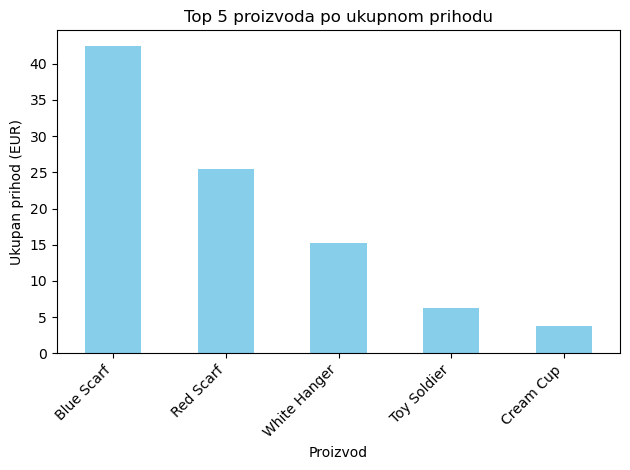

In [51]:
# Vizualizacija za Pitanje 1
revenue_by_product.plot(kind='bar', color='skyblue')
plt.title('Top 5 proizvoda po ukupnom prihodu')
plt.xlabel('Proizvod')
plt.ylabel('Ukupan prihod (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Osigurava da se labele ne preklapaju
plt.show()